In [1]:
import os, cv2, glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce 
plt.style.use('dark_background')

In [2]:
base_path = 'C:/Users/user/Desktop/OpenSource/project/dataset/celeba-dataset'
# img_base_path = os.path.join(base_path, 'img_align_celeba')
img_base_path = base_path + '/' + 'img_align_celeba' + '/' + 'img_align_celeba'
target_img_path = base_path + '/' + 'processed'

In [3]:
eval_list = np.loadtxt(base_path + '/' + 'list_eval_partition.csv', dtype=str, delimiter=',', skiprows=1)
print(eval_list)

[['000001.jpg' '0']
 ['000002.jpg' '0']
 ['000003.jpg' '0']
 ...
 ['202597.jpg' '2']
 ['202598.jpg' '2']
 ['202599.jpg' '2']]


(178, 178, 3) (177, 177, 3)


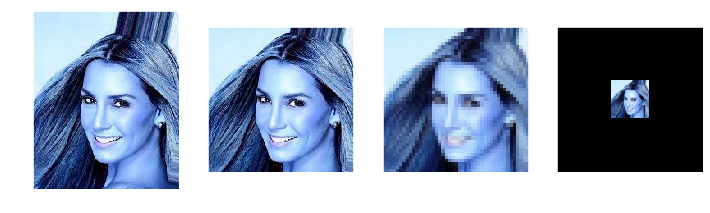

In [10]:
img_sample = cv2.imread(os.path.join(img_base_path, eval_list[0][0]))
# print(img_sample.shape)
h, w, _ = img_sample.shape

crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :]
# print(crop_sample.shape)
resized_sample = pyramid_reduce(crop_sample, downscale=4, multichannel = True)

pad = int((crop_sample.shape[0] - resized_sample.shape[0]) / 2)

padded_sample = cv2.copyMakeBorder(resized_sample, top=pad, bottom=pad, left=pad, right=pad, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

print(crop_sample.shape, padded_sample.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_sample)
plt.subplot(1, 4, 2)
plt.imshow(crop_sample)
plt.subplot(1, 4, 3)
plt.imshow(resized_sample)
plt.subplot(1, 4, 4)
plt.imshow(padded_sample)

In [42]:
downscale = 4
# n_train = 162770
n_train = 3000
# n_val = 19867
n_val = 3000
# n_test = 19962
n_test = 3000

for i, e in enumerate(eval_list[np.random.choice(200000, 2000, p = [1/200000 for i in range(200000)])]):
    filename, ext = os.path.splitext(e[0])
    
    img_path = img_base_path + '/' +  e[0]
#     print(img_path)
    
    img = cv2.imread(img_path)
    
    h, w, _ = img.shape
    
    crop = img[int((h-w)/2):int(-(h-w)/2), :]
    crop = cv2.resize(crop, dsize=(176, 176))
    resized = pyramid_reduce(crop, downscale=downscale, multichannel = True)

    norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)
    
    if int(e[1]) == 0:
        np.save(target_img_path + '/' + 'x_train' + '/' + filename + '.npy', resized)
        np.save(target_img_path + '/' + 'y_train' + '/' + filename + '.npy', norm)
    elif int(e[1]) == 1:
        np.save(target_img_path + '/' 'x_val' + '/' + filename + '.npy', resized)
        np.save(target_img_path + '/' 'y_val' + '/' + filename + '.npy', norm)
    elif int(e[1]) == 2:
        np.save(target_img_path + '/' + 'x_test' + '/' + filename + '.npy', resized)
        np.save(target_img_path + '/' + 'y_test' + '/' + filename + '.npy', norm)
